In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [139]:
start='2010-01-01'
end='2019-12-31'
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [140]:
df.tail()
 

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [35]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [36]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,19.000000,25.00,17.540001,23.889999,18766300
1,1,25.790001,30.42,23.299999,23.830000,17187100
2,2,25.000000,25.92,20.270000,21.959999,8218800
3,3,23.000000,23.10,18.709999,19.200001,5139800
4,4,20.000000,20.00,15.830000,16.110001,6866900


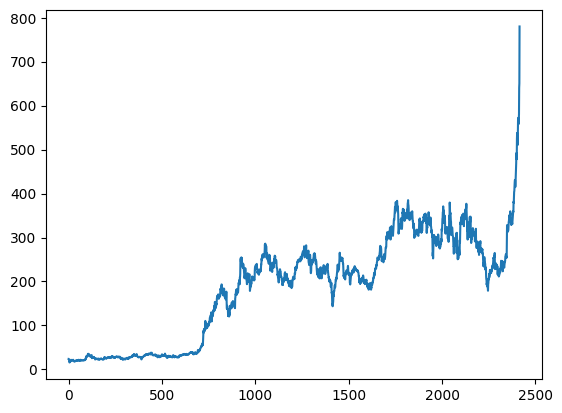

In [37]:
plt.plot(df.Close)

In [38]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    343.527601
2412    347.041701
2413    351.175301
2414    355.363101
2415    360.807701
Name: Close, Length: 2416, dtype: float64

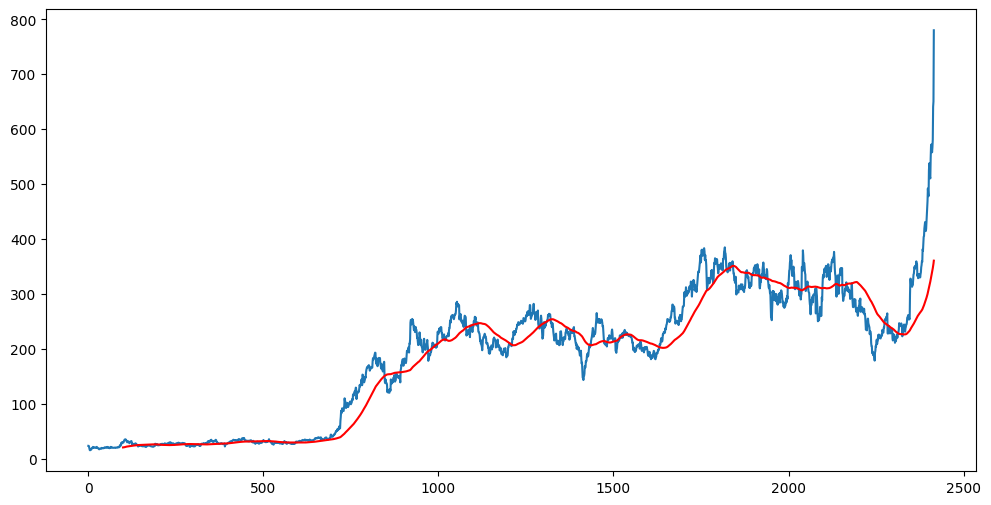

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [40]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    286.456801
2412    288.023250
2413    289.895400
2414    291.781451
2415    294.325300
Name: Close, Length: 2416, dtype: float64

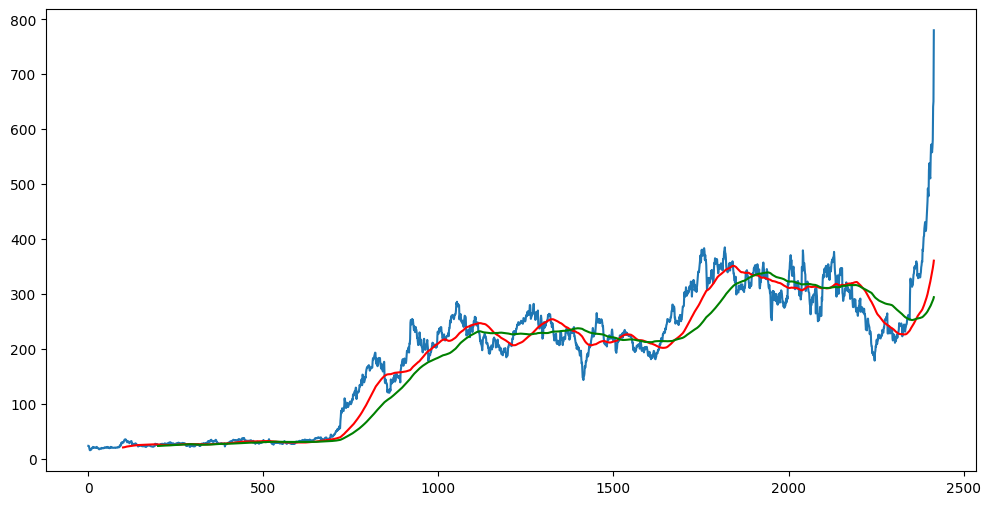

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [42]:
df.shape

(2416, 6)

In [43]:
#Spliting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1691, 1)
(725, 1)


In [44]:
data_training.head()

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


In [45]:
data_testing.head()

,Close
1691,261.500000
1692,261.920013
1693,250.679993
1694,255.009995
1695,254.779999


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [48]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.89624035],
       [0.88784039],
       [0.91122698]])

In [50]:
data_training_array.shape

(1691, 1)

In [51]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
     x_train.append(data_training_array[i-100:i])
     y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train), np.array(y_train)
    

    
    


In [52]:
x_train.shape

(1591, 100, 1)

In [73]:
#ML Model

In [54]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [55]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True,
              ))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True,
               ))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [26]:
model.compile(optimizer='adam' ,loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 410ms/step - loss: 0.1407
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - loss: 0.0143
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 616ms/step - loss: 0.0126
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 610ms/step - loss: 0.0128
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - loss: 0.0118
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - loss: 0.0094
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 376ms/step - loss: 0.0103
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 383ms/step - loss: 0.0086
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 384ms/step - loss: 0.0094
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - loss: 0.0078
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 524ms/step - loss: 0.0076
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - loss: 0.0076
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 534ms/step - loss: 0.0085
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 450ms/step - loss: 0.0072
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 

In [63]:
model.save('my_model.keras')

In [58]:
data_testing.head()

,Close
1691,261.500000
1692,261.920013
1693,250.679993
1694,255.009995
1695,254.779999


In [59]:
data_training.tail(100)

,Close
1591,200.089996
1592,202.759995
1593,202.339996
1594,202.240005
1595,204.009995
...,...
1686,243.690002
1687,246.169998
1688,258.000000
1689,255.729996


In [64]:
past_100_days=data_training.tail(100)

In [134]:
# final_df=past_100_days.append(data_testing, ignore_index=True)


final_df = pd.concat([past_100_days, pd.DataFrame([data_testing.iloc[0].to_dict()])], ignore_index=True)

                      

In [101]:
final_df.head()

,Close
0,200.089996
1,202.759995
2,202.339996
3,202.240005
4,204.009995


In [141]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.87280181e-01],
       [2.14106249e-01],
       [2.09886427e-01],
       [2.08881795e-01],
       [2.26665275e-01],
       [1.86074564e-01],
       [1.63568740e-01],
       [9.38409996e-02],
       [6.60103092e-02],
       [5.99819166e-02],
       [9.15301891e-02],
       [1.18155414e-01],
       [1.35537055e-01],
       [8.65065788e-02],
       [3.91842505e-02],
       [7.14357480e-02],
       [0.00000000e+00],
       [2.33096220e-02],
       [2.49170667e-02],
       [7.24405304e-02],
       [3.58686476e-02],
       [3.08450374e-02],
       [9.76589936e-02],
       [1.17452028e-01],
       [1.52717722e-01],
       [1.47392705e-01],
       [8.15835312e-02],
       [7.98753731e-02],
       [4.32038521e-03],
       [2.00984599e-04],
       [5.37526901e-02],
       [4.42078608e-02],
       [1.17552450e-01],
       [1.08911830e-01],
       [1.07806636e-01],
       [1.10318441e-01],
       [1.67788553e-01],
       [1.73214132e-01],
       [1.62061717e-01],
       [2.11393600e-01],


In [126]:
input_data.shape

(101, 1)

In [127]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [128]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1, 100, 1)
(1,)


In [108]:
#making prediction
y_predicted=model.predict(x_test)

1/1 [==============================] - 0s 117ms/step


In [120]:
y_predicted.shape

(1, 1)

In [131]:
y_test

array([0.80428003])

In [122]:
y_predicted

array([[16119.401]], dtype=float32)

In [123]:
scaler.scale_

array([0.01004722])

In [124]:
scale_factor=1/0.01004722
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

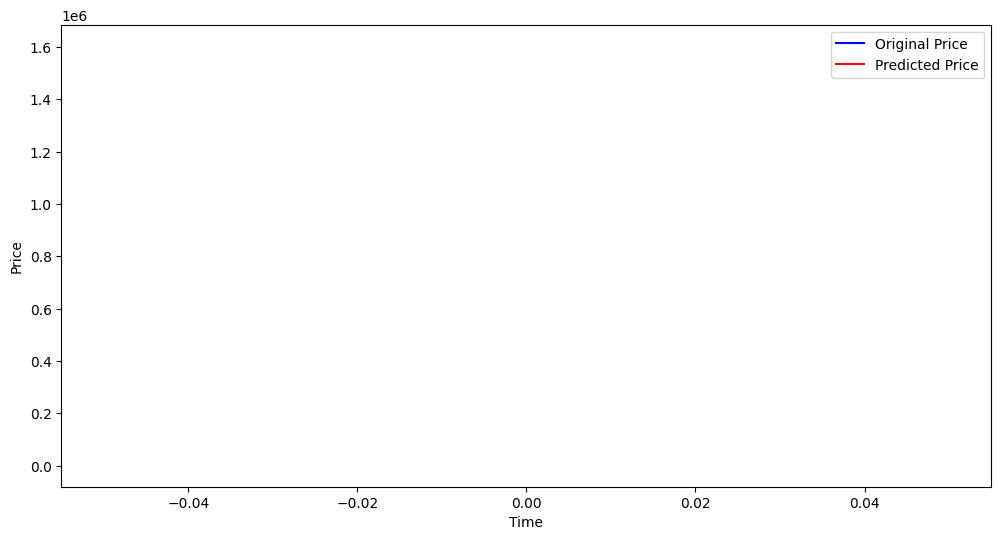

In [142]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b' ,label ='Original Price')
plt.plot(y_predicted,'r' ,label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

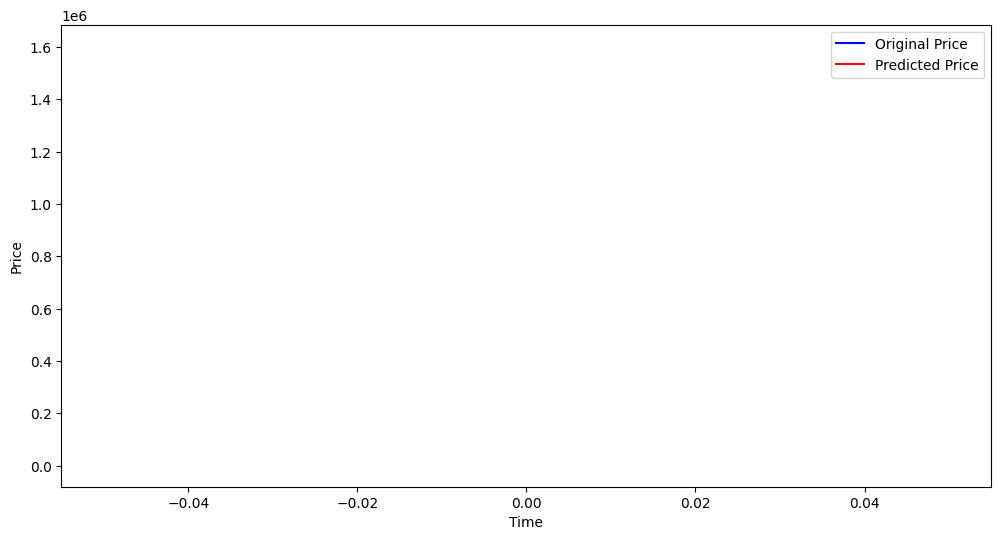

In [142]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b' ,label ='Original Price')
plt.plot(y_predicted,'r' ,label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()